In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [107]:
df=pd.read_csv("/content/housing_data.csv")
print("Data set loaded Successfully!!")
df.head()

Data set loaded Successfully!!


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [108]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Info:")
print(df.info())

print("\nEnd Data of data set:")
df.tail()

Dataset Shape: (506, 14)

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 no

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [109]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [110]:
# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)


In [111]:
print("Checking for missing values after filling:")
print(df.isnull().sum())

Checking for missing values after filling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<Axes: >

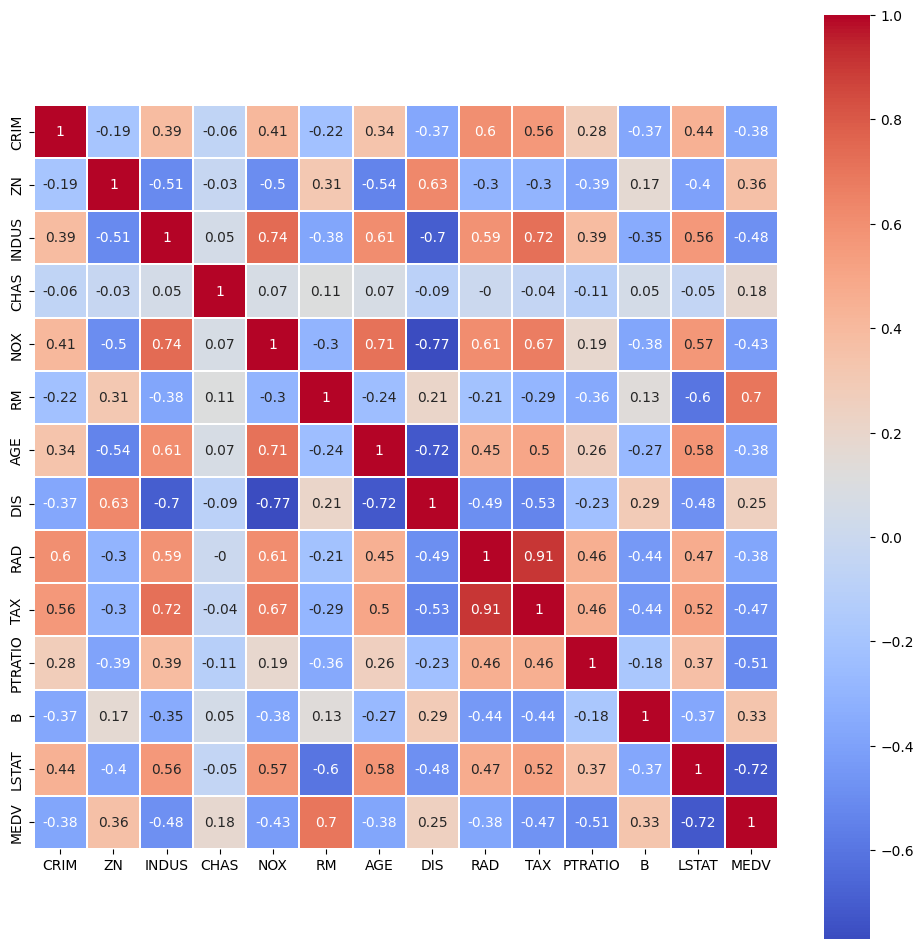

In [112]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2), annot=True,cmap='coolwarm', linewidth=0.2, square=True )

In [113]:
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,11.43,36.2
...,...,...,...,...,...
501,6.593,273,21.0,11.43,22.4
502,6.120,273,21.0,9.08,20.6
503,6.976,273,21.0,5.64,23.9
504,6.794,273,21.0,6.48,22.0


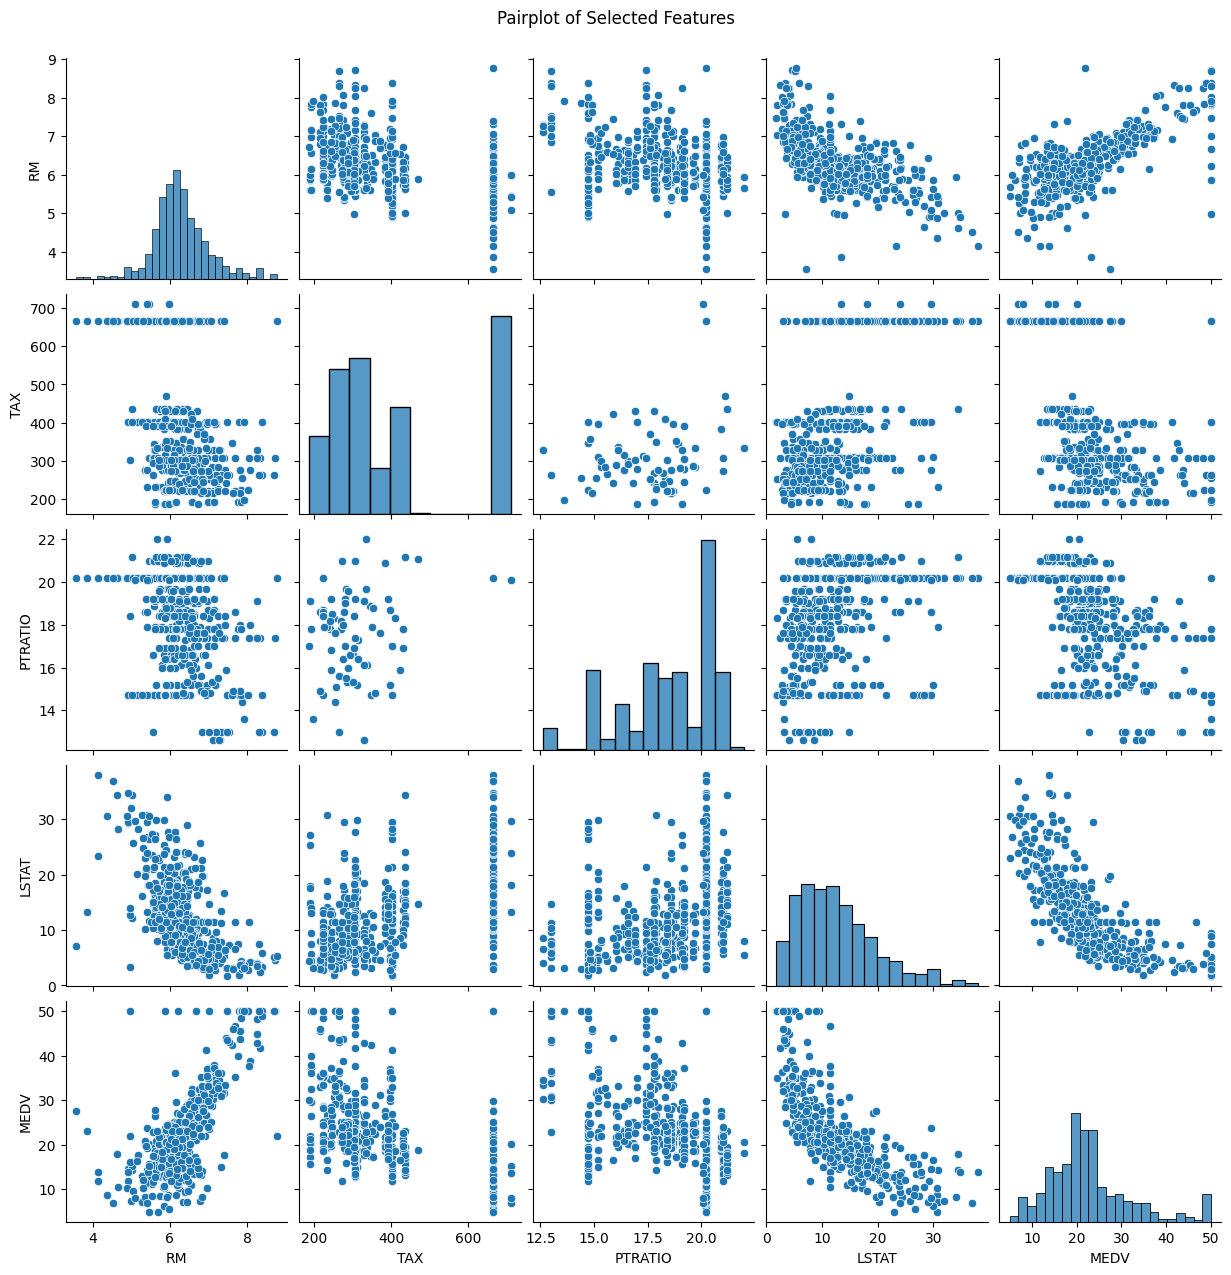

In [114]:
# Generate a pairplot for the selected columns
sns.pairplot(df1)
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adds a title
plt.show()


In [115]:
desc=df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00
mean,6.28,408.24,18.46,12.66,22.53
std,0.70,168.54,2.16,7.02,9.20
min,3.56,187.00,12.60,1.73,5.00
25%,5.89,279.00,17.40,7.23,17.02
50%,6.21,330.00,19.05,11.43,21.20
75%,6.62,666.00,20.20,16.57,25.00
max,8.78,711.00,22.00,37.97,50.00


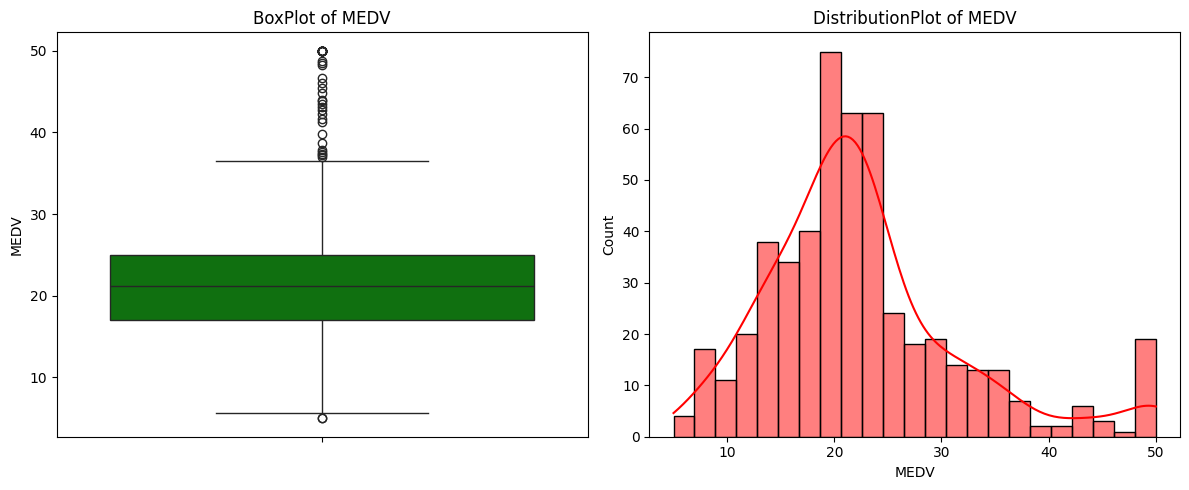

In [116]:

# Create side-by-side boxplot and histogram
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(df1.MEDV, color='green')
plt.title('BoxPlot of MEDV')

# Distribution plot with KDE
plt.subplot(1, 2, 2)
sns.histplot(df1.MEDV, kde=True, color='red')
plt.title('DistributionPlot of MEDV')

# Display the plots
plt.tight_layout()  # Adjusts spacing for better fit
plt.show()


In [117]:
MEDV_Q3=desc['MEDV']['75%']
MEDV_Q1=desc['MEDV']['25%']
MEDV_IQR=MEDV_Q3-MEDV_Q1
MEDV_UB = MEDV_Q3 + 1.5 * MEDV_IQR
MEDV_LB = MEDV_Q1 - 1.5 * MEDV_IQR


In [118]:
df1[df1['MEDV']>MEDV_UB].sort_values(by=['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398,15.2,5.10,37.0
179,6.980,193,17.8,5.04,37.2
291,7.148,245,19.2,3.56,37.3
226,8.040,307,17.4,11.43,37.6
182,7.155,193,17.8,4.82,37.9
97,8.069,276,18.0,4.21,38.7
180,7.765,193,17.8,7.56,39.8
157,6.943,403,14.7,4.59,41.3
232,8.337,307,17.4,2.47,41.7
202,7.610,348,14.7,3.11,42.3


In [119]:
print(f"Shape of dataset before removing outlier :{df1.shape}")
df2 = df1[~(df1['MEDV'] == 50)]

print(f"Shape of dataset after removing outlier :{df2.shape}")

Shape of dataset before removing outlier :(506, 5)
Shape of dataset after removing outlier :(490, 5)


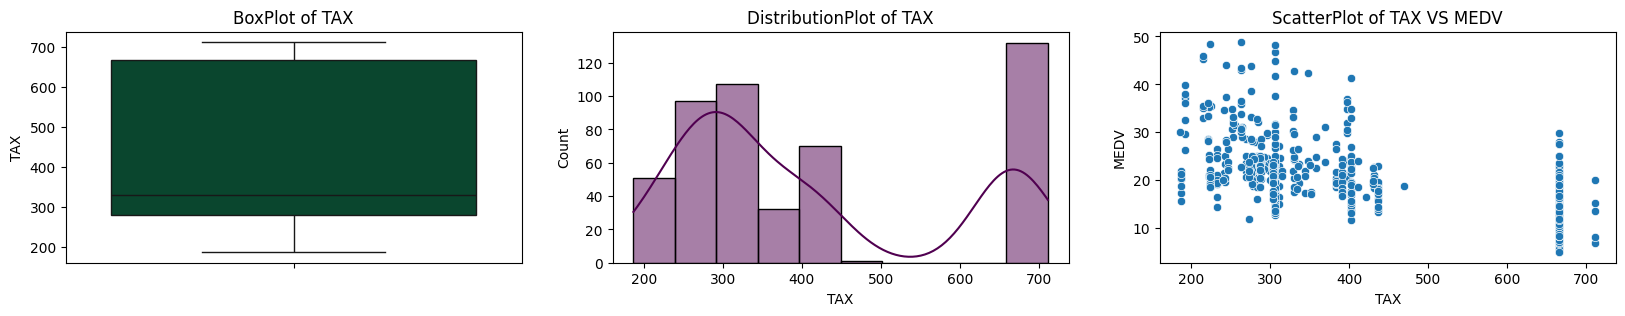

In [120]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.TAX, color = '#005030')
plt.title('BoxPlot of TAX')

plt.subplot(1,3,2)
sns.histplot(df2.TAX, color = '#500050', kde=True)
plt.title('DistributionPlot of TAX')


plt.subplot(1,3,3)
sns.scatterplot(x = df2.TAX ,y = df2.MEDV )
plt.title('ScatterPlot of TAX VS MEDV')
#Purpose: To explore how TAX correlates with MEDV and detect any potential anomalies or unusual data points in their relationship.

plt.show()

In [121]:
temp_df=df2[df2['TAX']>600].sort_values(by=['RM','MEDV'])
temp_df

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,666,20.2,7.12,27.5
367,3.863,666,20.2,13.33,23.1
406,4.138,666,20.2,23.34,11.9
374,4.138,666,20.2,37.97,13.8
384,4.368,666,20.2,30.63,8.8
...,...,...,...,...,...
473,6.980,666,20.2,11.43,29.8
482,7.061,666,20.2,7.01,25.0
375,7.313,666,20.2,13.44,15.0
453,7.393,666,20.2,16.74,17.8


In [122]:
temp_df
temp_df.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.000689,667.704545,20.196212,18.828864,14.994697
std,0.712621,8.623365,0.019163,6.590380,5.405825
min,3.561000,666.000000,20.100000,5.290000,5.000000
25%,5.674250,666.000000,20.200000,14.175000,10.900000
50%,6.139500,666.000000,20.200000,17.910000,14.100000
75%,6.407250,666.000000,20.200000,23.052500,19.200000
max,8.780000,711.000000,20.200000,37.970000,29.800000


In [123]:
TAX_10 = df2[(df2['TAX']<600) & (df2['LSTAT']>=0) & (df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = df2[(df2['TAX']<600) & (df2['LSTAT']>=10) & (df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = df2[(df2['TAX']<600) & (df2['LSTAT']>=20) & (df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = df2[(df2['TAX']<600) & (df2['LSTAT']>=30)]['TAX'].mean()


In [124]:
# Higher LSTAT (poorer areas) should have higher taxes
df2.loc[(df2['TAX'] > 600) & (df2['LSTAT'] < 10), 'TAX'] = TAX_40  # Wealthier (lower LSTAT) areas
df2.loc[(df2['TAX'] > 600) & (df2['LSTAT'] >= 10) & (df2['LSTAT'] < 20), 'TAX'] = TAX_30
df2.loc[(df2['TAX'] > 600) & (df2['LSTAT'] >= 20) & (df2['LSTAT'] < 30), 'TAX'] = TAX_20
df2.loc[(df2['TAX'] > 600) & (df2['LSTAT'] >= 30), 'TAX'] = TAX_10  # Poorer (higher LSTAT) areas

print("Values imputed successfully")


Values imputed successfully


<ipython-input-124-3a0ff6b92537>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '338.6363636363636' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2['TAX'] > 600) & (df2['LSTAT'] >= 10) & (df2['LSTAT'] < 20), 'TAX'] = TAX_30


In [125]:
#This show all those extreme TAX values are replaced successfully
df2[df2['TAX']>600]['TAX'].count()

np.int64(0)

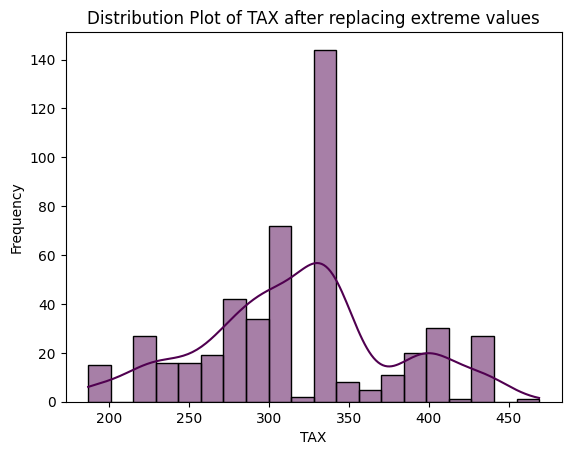

In [126]:
sns.histplot(data=df2, x='TAX', kde=True, color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.xlabel('TAX')
plt.ylabel('Frequency')
plt.show()


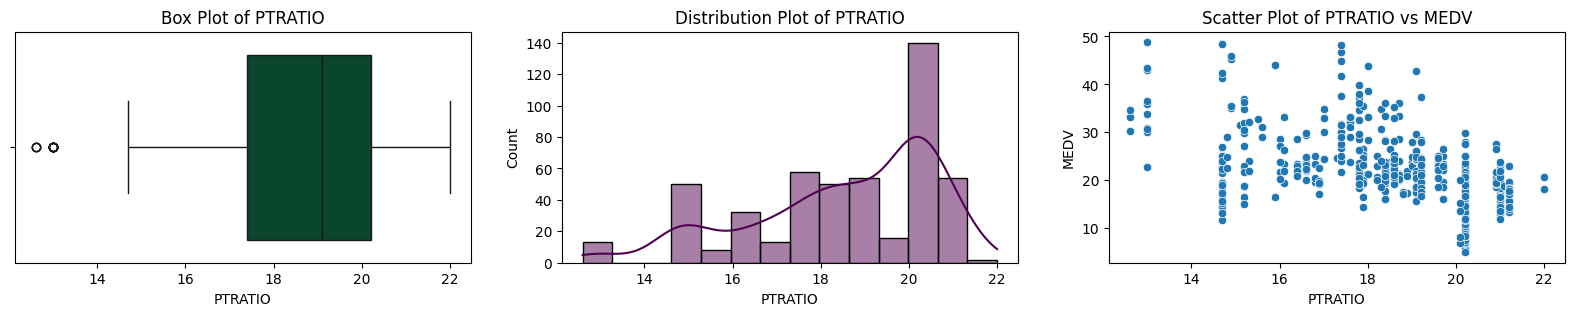

In [127]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(x=df2.PTRATIO, color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.histplot(df2.PTRATIO, kde=True, color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(x=df2.PTRATIO, y=df2.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()


In [128]:
df2[df2['PTRATIO'] < 14].sort_values(by=['LSTAT', 'MEDV'])


,RM,TAX,PTRATIO,LSTAT,MEDV
268,7.470,264.0,13.0,3.16,43.5
196,7.287,329.0,12.6,4.08,33.3
262,8.398,264.0,13.0,5.91,48.8
198,7.274,329.0,12.6,6.62,34.6
259,6.842,264.0,13.0,6.90,30.1
261,7.520,264.0,13.0,7.26,43.1
258,7.333,264.0,13.0,7.79,36.0
264,7.206,264.0,13.0,8.10,36.5
197,7.107,329.0,12.6,8.61,30.3
260,7.203,264.0,13.0,9.59,33.8


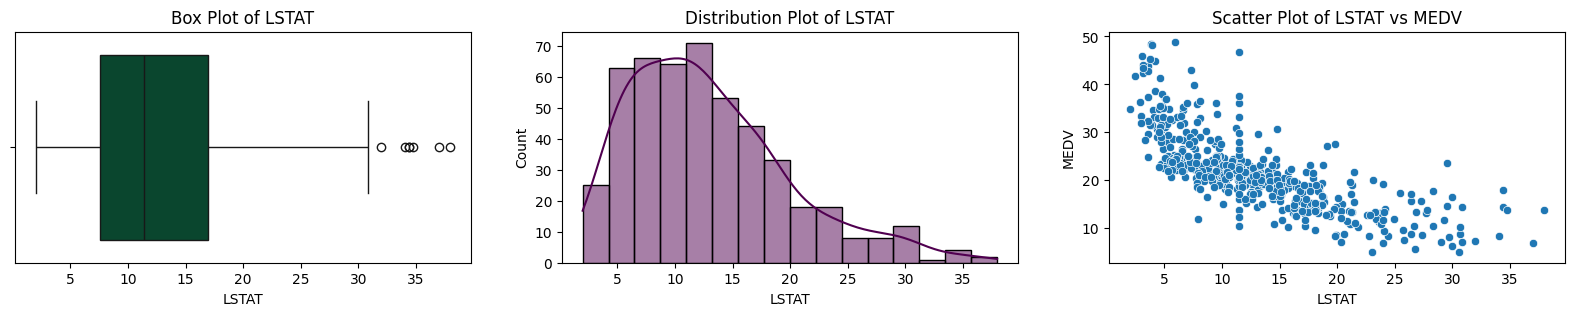

In [129]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(x=df2.LSTAT, color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.histplot(df2.LSTAT, kde=True, color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(x=df2.LSTAT, y=df2.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()


In [130]:
LSTAT_Q3 = df2['LSTAT'].quantile(0.75)
LSTAT_Q1 = df2['LSTAT'].quantile(0.25)
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1

LSTAT_UV = LSTAT_Q3 + 1.5 * LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5 * LSTAT_IQR

df2[df2['LSTAT'] > LSTAT_UV].sort_values(by='LSTAT')


,RM,TAX,PTRATIO,LSTAT,MEDV
387,5.000,294.139785,20.2,31.99,7.4
438,5.935,294.139785,20.2,34.02,8.4
412,4.628,294.139785,20.2,34.37,17.9
141,5.019,437.000000,21.2,34.41,14.4
373,4.906,294.139785,20.2,34.77,13.8
414,4.519,294.139785,20.2,36.98,7.0
374,4.138,294.139785,20.2,37.97,13.8


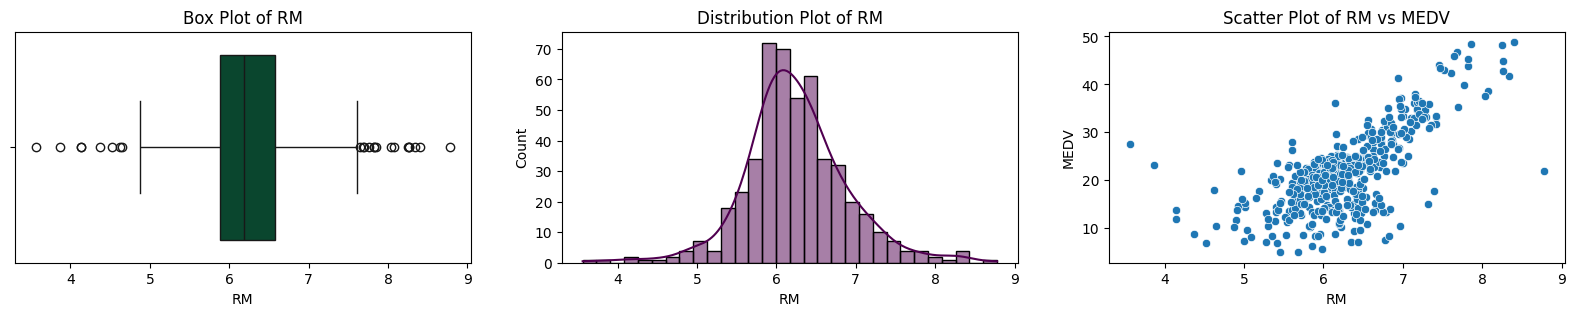

In [131]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(x=df2.RM, color='#005030')
plt.title('Box Plot of RM')

plt.subplot(1,3,2)
sns.histplot(df2.RM, kde=True, color='#500050')
plt.title('Distribution Plot of RM')

plt.subplot(1,3,3)
sns.scatterplot(x=df2.RM, y=df2.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()


In [132]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

In [133]:
df2[df2['RM']<RM_LV].sort_values(by=['RM','MEDV'])


,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,335.000000,20.2,7.12,27.5
367,3.863,338.636364,20.2,13.33,23.1
406,4.138,330.770270,20.2,23.34,11.9
374,4.138,294.139785,20.2,37.97,13.8
384,4.368,294.139785,20.2,30.63,8.8
414,4.519,294.139785,20.2,36.98,7.0
412,4.628,294.139785,20.2,34.37,17.9
386,4.652,330.770270,20.2,28.28,10.5


In [134]:
print(df2[df2['RM'] < RM_LV].count()[0])


8


<ipython-input-134-878ba9e68ecf>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df2[df2['RM'] < RM_LV].count()[0])


In [135]:
rm_outlier_indices = df2[df2['RM'] < RM_LV].index
print(f"Shape before removing RM outliers: {df2.shape}")
df3 = df2.drop(index=rm_outlier_indices)
print(f"Shape after removing RM outliers: {df3.shape}")


Shape before removing RM outliers: (490, 5)
Shape after removing RM outliers: (482, 5)


In [136]:
# Find indices of RM upper outliers
rm_high_outliers = df3[df3['RM'] > RM_UV].index

# Drop those outliers
print(f"Shape before removing high RM outliers: {df3.shape}")
df3 = df3.drop(index=rm_high_outliers)
print(f"Shape after removing high RM outliers: {df3.shape}")


Shape before removing high RM outliers: (482, 5)
Shape after removing high RM outliers: (470, 5)


In [137]:
X = df3[['RM', 'TAX', 'PTRATIO', 'LSTAT']].values
y = df3['MEDV'].values


In [138]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")


Shape of Dependent Variable X = (470, 4)
Shape of Independent Variable y = (470,)


In [139]:
from sklearn.preprocessing import StandardScaler

def FeatureScaling(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

FeatureScaling(X)

array([[ 0.65052977, -0.38857101, -1.53121776, -1.2015589 ],
       [ 0.35896159, -1.30544228, -0.34512714, -0.57110775],
       [ 1.80544267, -1.30544228, -0.34512714, -1.34553212],
       ...,
       [ 1.40974301, -0.77909026,  1.17306886, -1.1015354 ],
       [ 1.06516243, -0.77909026,  1.17306886, -0.97423276],
       [-0.38131864, -0.77909026,  1.17306886, -0.7620617 ]])

In [140]:
from sklearn.linear_model import LinearRegression


In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [143]:
y_pred = model.predict(X_test)
print(y_pred[:5])


[31.3745186  21.61554123 14.32862712 25.70368412 19.1498132 ]


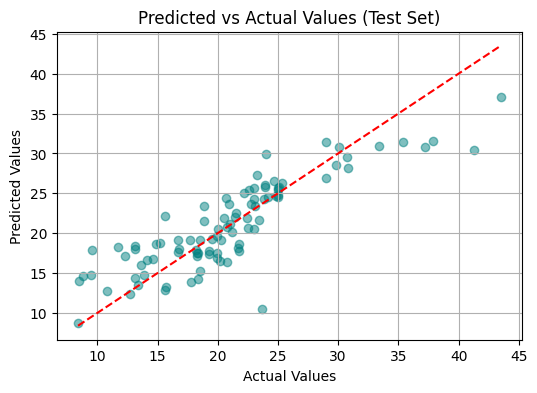

In [144]:
# Plot Predicted vs Actual values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='teal', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test Set)')
plt.grid(True)
plt.show()


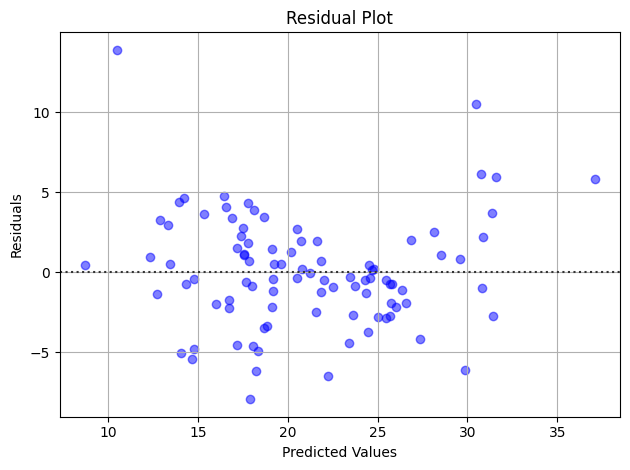

In [145]:
sns.residplot(x=y_pred.flatten(), y=(y_test - y_pred).flatten(), scatter_kws={'alpha': 0.5, 'color': 'blue'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


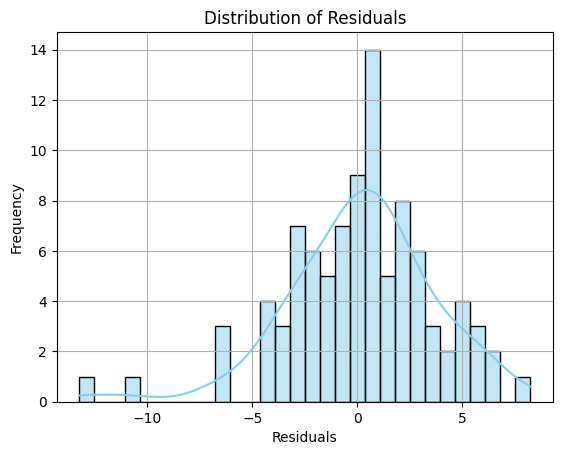

In [146]:
# Calculate residuals
residuals = y_pred - y_test

# Plot the distribution of residuals
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


In [147]:
from sklearn import metrics

# Calculate R²
r2 = metrics.r2_score(y_test, y_pred)

# Print R² score
print(f'R² Score: {r2:.4f}')


R² Score: 0.7340


In [148]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)  # Calculates Mean Squared Error
mae = metrics.mean_absolute_error(y_test, y_pred)  # Calculates Mean Absolute Error
rmse = np.sqrt(mse)  # Takes the square root of MSE to calculate RMSE

# Prints the calculated values
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 12.25
Mean Absolute Error (MAE): 2.60
Root Mean Squared Error (RMSE): 3.50
